In [3]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(rc={"figure.figsize": (5, 5)})
sns.set_style('white')


## AR(1)​ ​with​ ​thetas​ ​-0.9,​ ​-0.8,​ ​...0.9

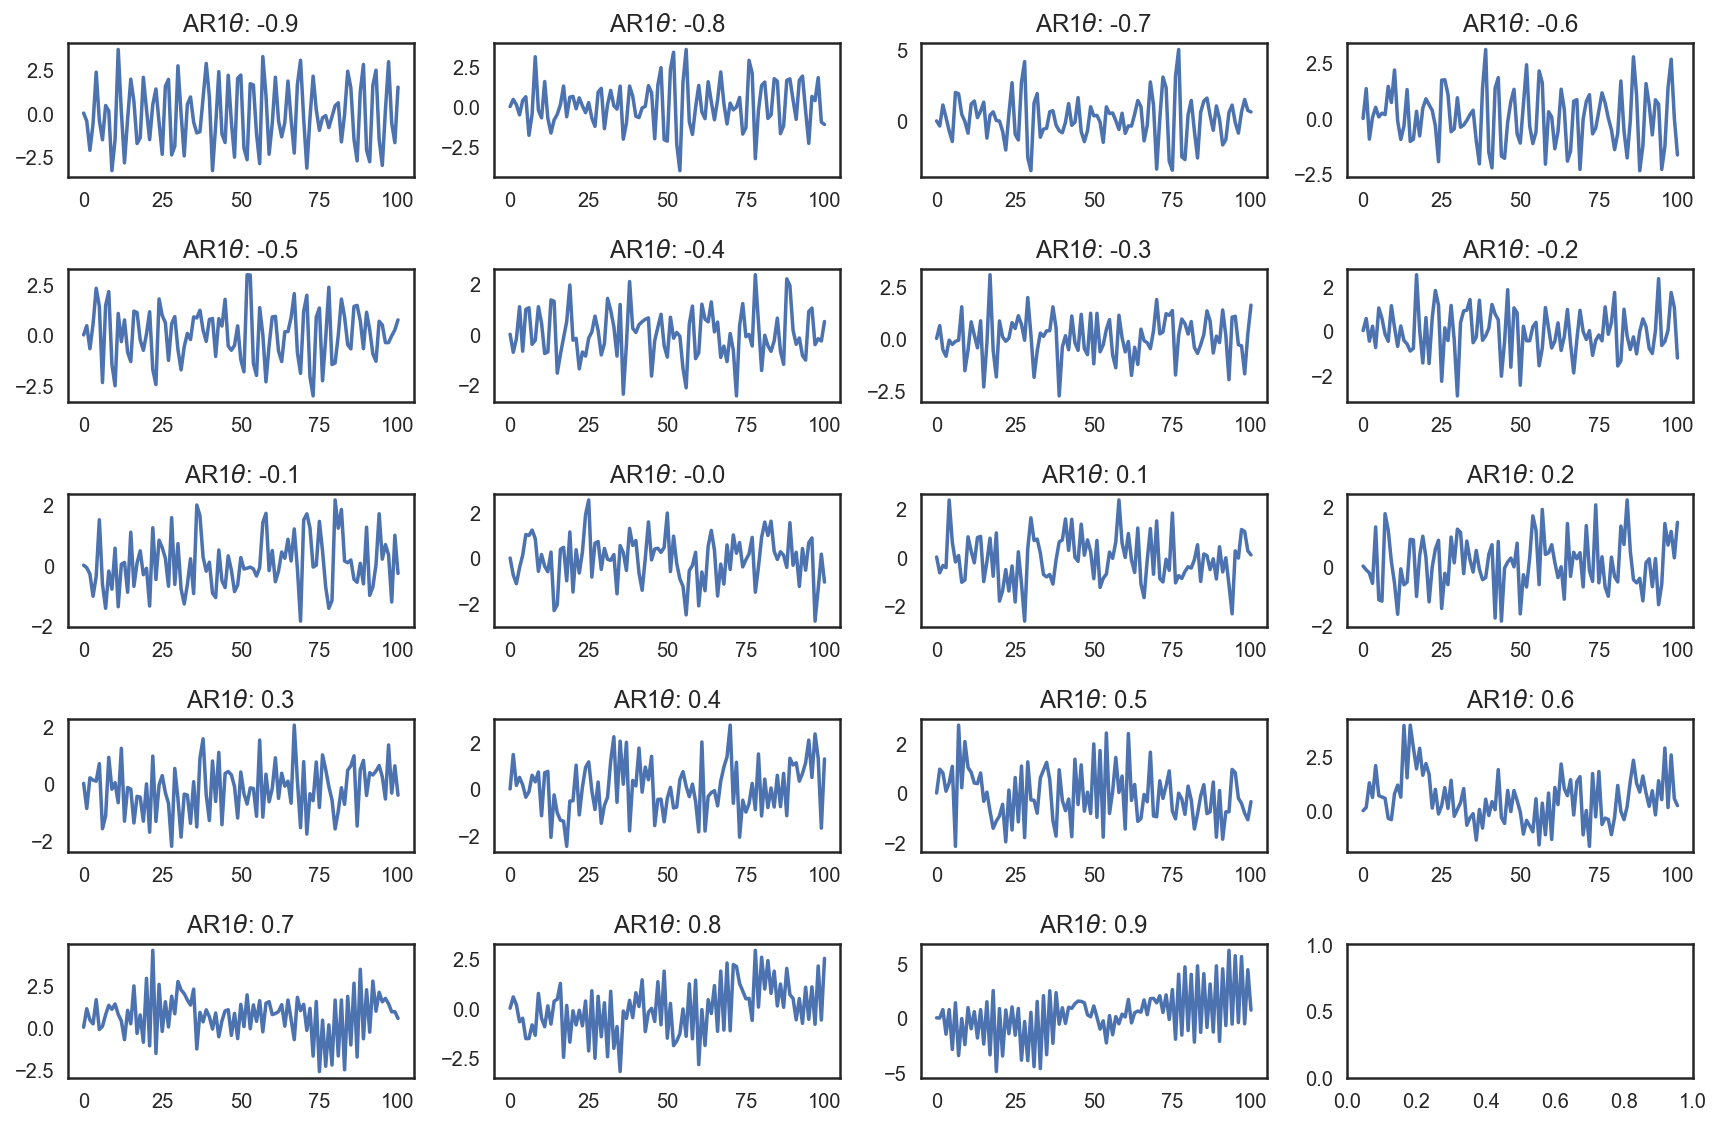

In [2]:
thetas = [round(i,1) for i in np.arange(-.9,1,.1)]

def ar1_theta(theta):
    x_array = [0]
    for i in range(100):
        noise = np.random.normal()
        
        x_i = x_array[i-1]   # previous x value
        
        x = (x_i * theta) + noise
        x_array.append(x)
        
    return x_array

fig, axes = plt.subplots(nrows=5, ncols=4, figsize = (12,8) )
fig.tight_layout()

for index, theta in enumerate(thetas):
    axes.flatten()[index].set_title(str(r"AR1$\theta$: "+str(theta)))
    axes.flatten()[index].plot(ar1_theta(theta))
    if index > len(thetas):
        break
fig.tight_layout()
plt.show()

## AR(2)​ ​with​ ​thetas​ ​(-.5,​ ​0),​ ​(0,​ ​0),​ ​(.5,​ ​0),​ ​(0,​ ​.5)

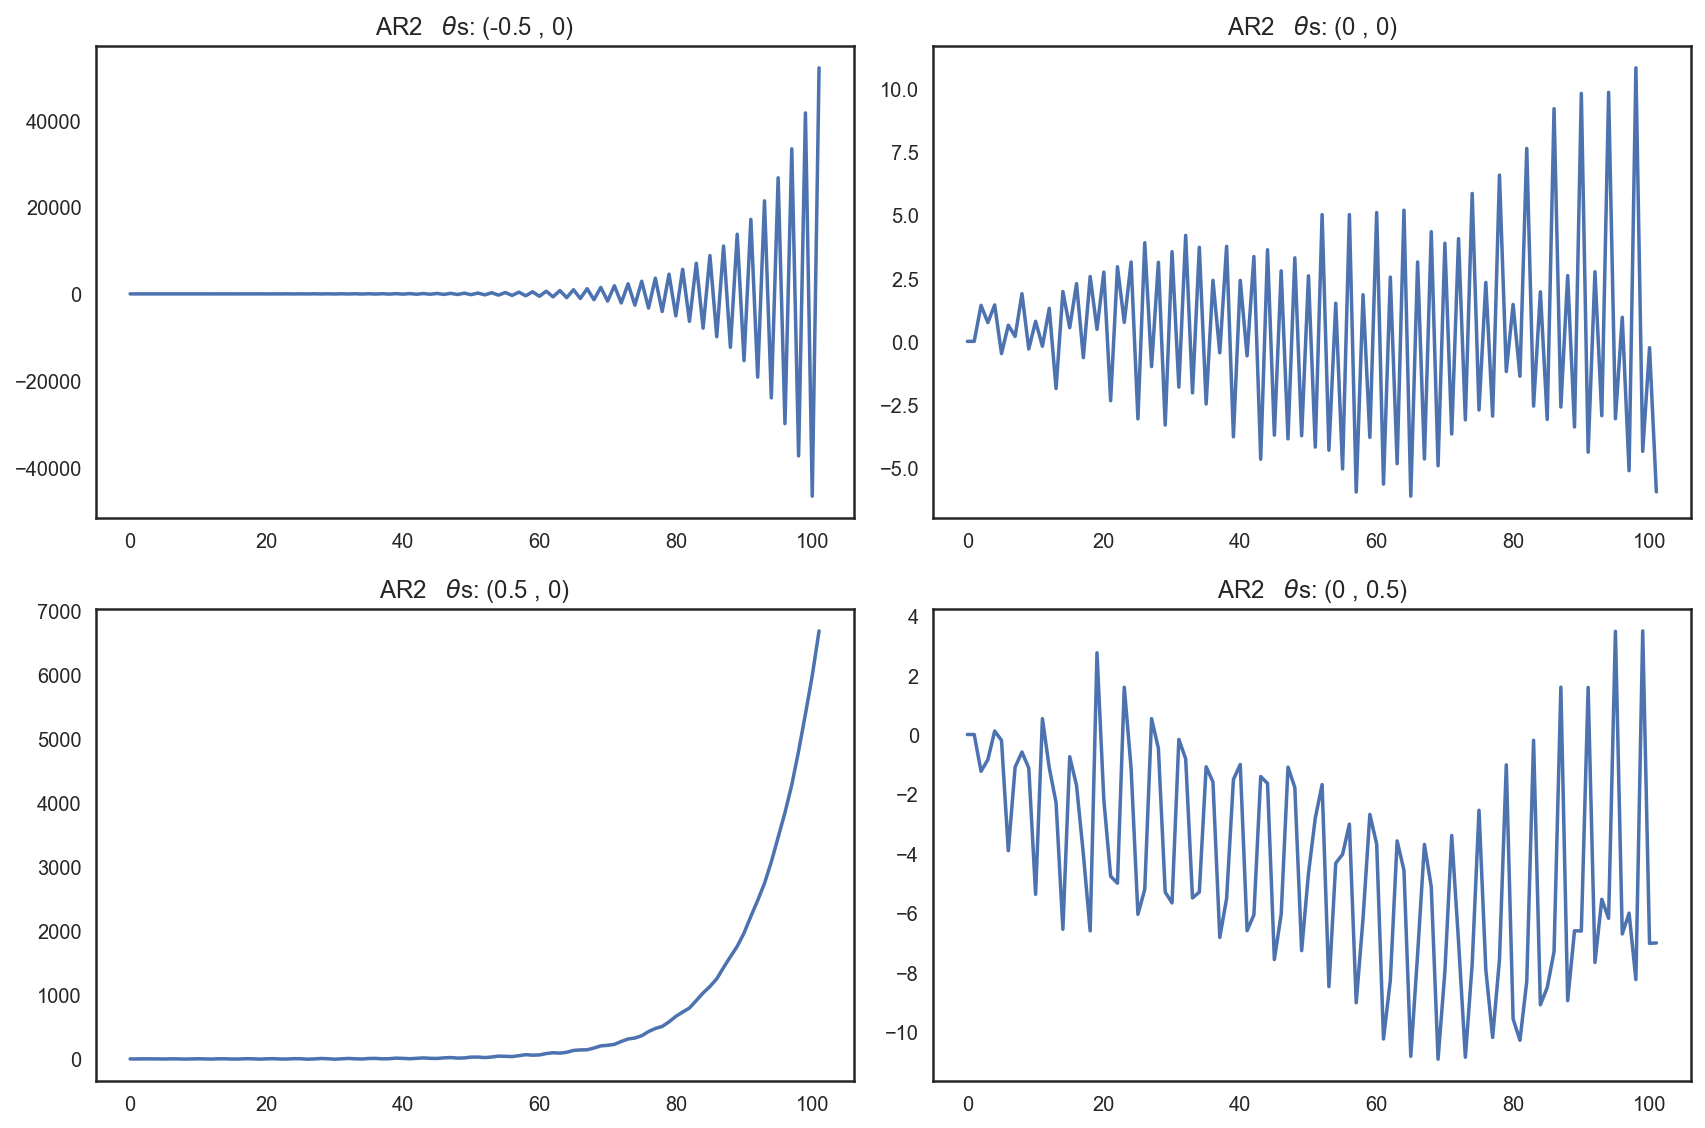

In [3]:
thetas = [(-.5,0),(0,0), (.5,0), (0,.5)]

def ar2_theta(theta):
    x_array = [0,0]
    
    theta_1 = theta[0]
    theta_2 = theta[1]
    
    for i in range(100):
        noise = np.random.normal()
        
        x_i = x_array[i-1]   # previous x value
        x_i_2 = x_array[i-2]   # preious 2 x value

        
        x = (x_i * theta_1) + (x_i_2) + noise
        x_array.append(x)
        
    return x_array

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12,8) )
fig.tight_layout()

for index, theta in enumerate(thetas):
    axes.flatten()[index].set_title(str(r"AR2   $\theta$s: "+"("+str(theta[0])+" , "+str(theta[1]))+")")
    axes.flatten()[index].plot(ar2_theta(theta))
    if index > len(thetas):
        break
fig.tight_layout()
plt.show()

(2) Autocorrelation
Plot​ ​the​ ​autocorrelation​ ​and​ ​partial​ ​autocorrelation​ ​for
- sin(x)
- sin(2*x)
- sin(x​ ​+​ ​2*x​ ​+​ ​7*x)

for x[0,​ ​0.1,​ ​…,​ ​10]

/Users/Stav/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/Stav/anaconda2/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


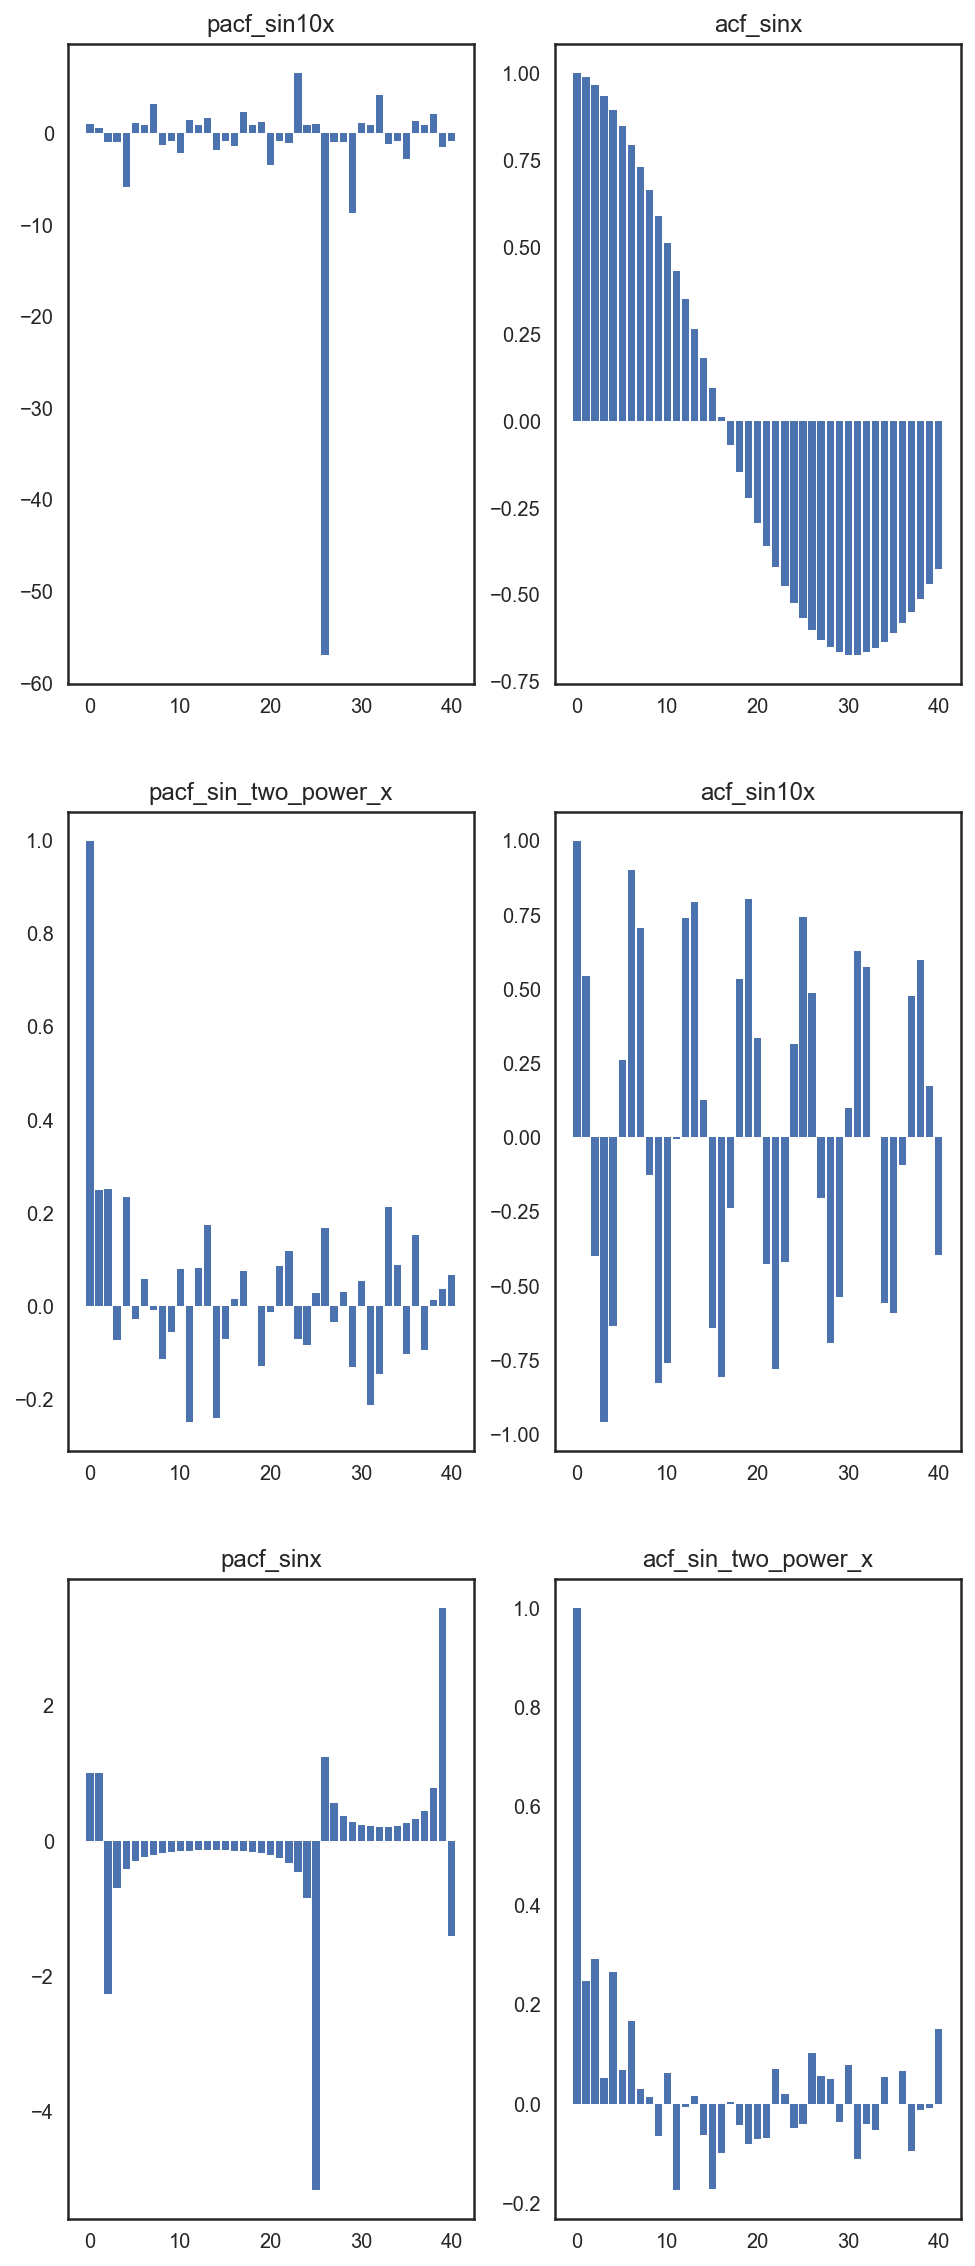

In [4]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

x_s = [round(i,1) for i in np.arange(0,10.1,.1)]

sin_x = np.sin(x_s)
sin_two_power_x = [np.sin(2**x) for x in x_s]
sin_10x = [np.sin(10*x) for x in x_s]
     
acf_sinx = acf(sin_x)
pacf_sinx = pacf(sin_x)

acf_sin_two_power_x = acf(sin_two_power_x)
pacf_sin_two_power_x = pacf(sin_two_power_x)

acf_sin10x = acf(sin_10x)
pacf_sin10x = pacf(sin_10x)

functions = {"acf_sinx": acf_sinx,
            "pacf_sinx": pacf_sinx,
            "acf_sin_two_power_x": acf_sin_two_power_x,
            "pacf_sin_two_power_x": pacf_sin_two_power_x,
            "acf_sin10x":acf_sin10x,
            "pacf_sin10x": pacf_sin10x}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (8,20) )

for ax, function in  zip(axes.flatten(), functions.keys()):
    f_x = functions[function]
    
    ax.bar(np.arange(len(f_x)), f_x)
    ax.set_title(function)

plt.show()
    

In [1]:
import pandas as pd
taxis = pd.read_csv("./train.csv")
taxis.TIMESTAMP = pd.to_datetime(taxis.TIMESTAMP, unit = "s")
taxis['date'] = taxis.TIMESTAMP.apply(lambda val: str(val).split()[0])
rides_per_day = taxis.groupby("date").count().reset_index()[['date','TRIP_ID']]

rides_per_day.columns = ["date", "num_rides"]

rides_per_day.num_rides = rides_per_day.num_rides.astype("int")

rides_per_day.date = pd.to_datetime(rides_per_day.date)

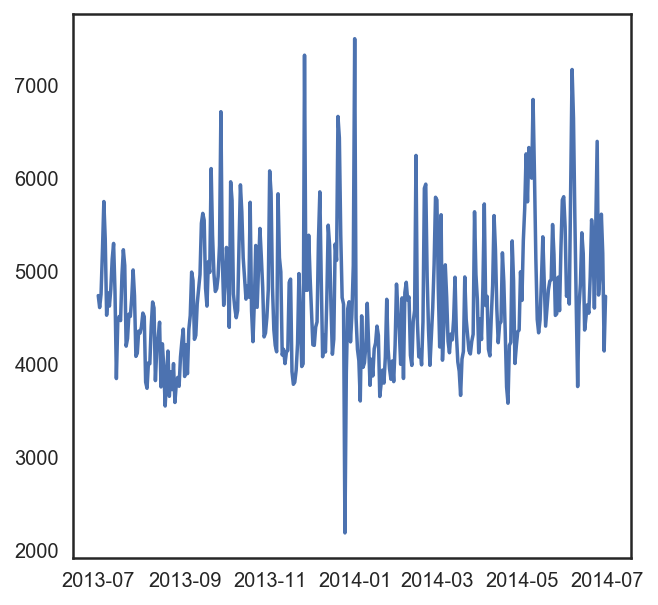

In [4]:
plt.plot(rides_per_day.set_index("date"))

b. Generate​ ​a​ ​table​ ​with​ ​a​ ​column​ ​for​ ​each​ ​of​ ​the​ ​previous​ ​14​ ​days​ ​for​ ​each​ ​date​ ​and​ ​split​ ​the
data​ ​halfway​ ​to​ ​train​ ​and​ ​test

In [5]:
shift_rides_per_day = rides_per_day.set_index("date")
shifted_rides = pd.concat([shift_rides_per_day, 
           shift_rides_per_day.shift(), 
           shift_rides_per_day.shift(2), 
           shift_rides_per_day.shift(3), 
           shift_rides_per_day.shift(4),
           shift_rides_per_day.shift(5),
           shift_rides_per_day.shift(6),
           shift_rides_per_day.shift(7),
           shift_rides_per_day.shift(8),
           shift_rides_per_day.shift(9),
           shift_rides_per_day.shift(10),
           shift_rides_per_day.shift(11),
           shift_rides_per_day.shift(12),
           shift_rides_per_day.shift(13),
           shift_rides_per_day.shift(14) ], axis=1)

shifted_rides.head()
shifted_rides.columns = ["num_rides_" + str(shift) for shift in range(15)]


In [6]:
shifted_rides.head()

num_rides_0  num_rides_1  num_rides_2  num_rides_3  num_rides_4  \
date                                                                          
2013-07-01         4734          NaN          NaN          NaN          NaN   
2013-07-02         4605       4734.0          NaN          NaN          NaN   
2013-07-03         4749       4605.0       4734.0          NaN          NaN   
2013-07-04         5213       4749.0       4605.0       4734.0          NaN   
2013-07-05         5744       5213.0       4749.0       4605.0       4734.0   

            num_rides_5  num_rides_6  num_rides_7  num_rides_8  num_rides_9  \
date                                                                          
2013-07-01          NaN          NaN          NaN          NaN          NaN   
2013-07-02          NaN          NaN          NaN          NaN          NaN   
2013-07-03          NaN          NaN          NaN          NaN          NaN   
2013-07-04          NaN          NaN          NaN          NaN          NaN   
2013-07-05          NaN          NaN          NaN          NaN          NaN   

            num_rides_10  num_rides_11  num_rides_12  num_rides_13  \
date                                                                 
2013-07-01           NaN           NaN           NaN           NaN   
2013-07-02           NaN           NaN           NaN           NaN   
2013-07-03           NaN           NaN           NaN           NaN   
2013-07-04           NaN           NaN           NaN           NaN   
2013-07-05           NaN           NaN           NaN           NaN   

            num_rides_14  
date                      
2013-07-01           NaN  
2013-07-02           NaN  
2013-07-03           NaN  
2013-07-04           NaN  
2013-07-05           NaN

In [8]:
shifted_rides.to_csv("./shifted_rides.csv")
shited_rides = pd.read_csv("./shifted_rides.csv")

/Users/Stav/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


TypeError: 'Figure' object does not support indexing

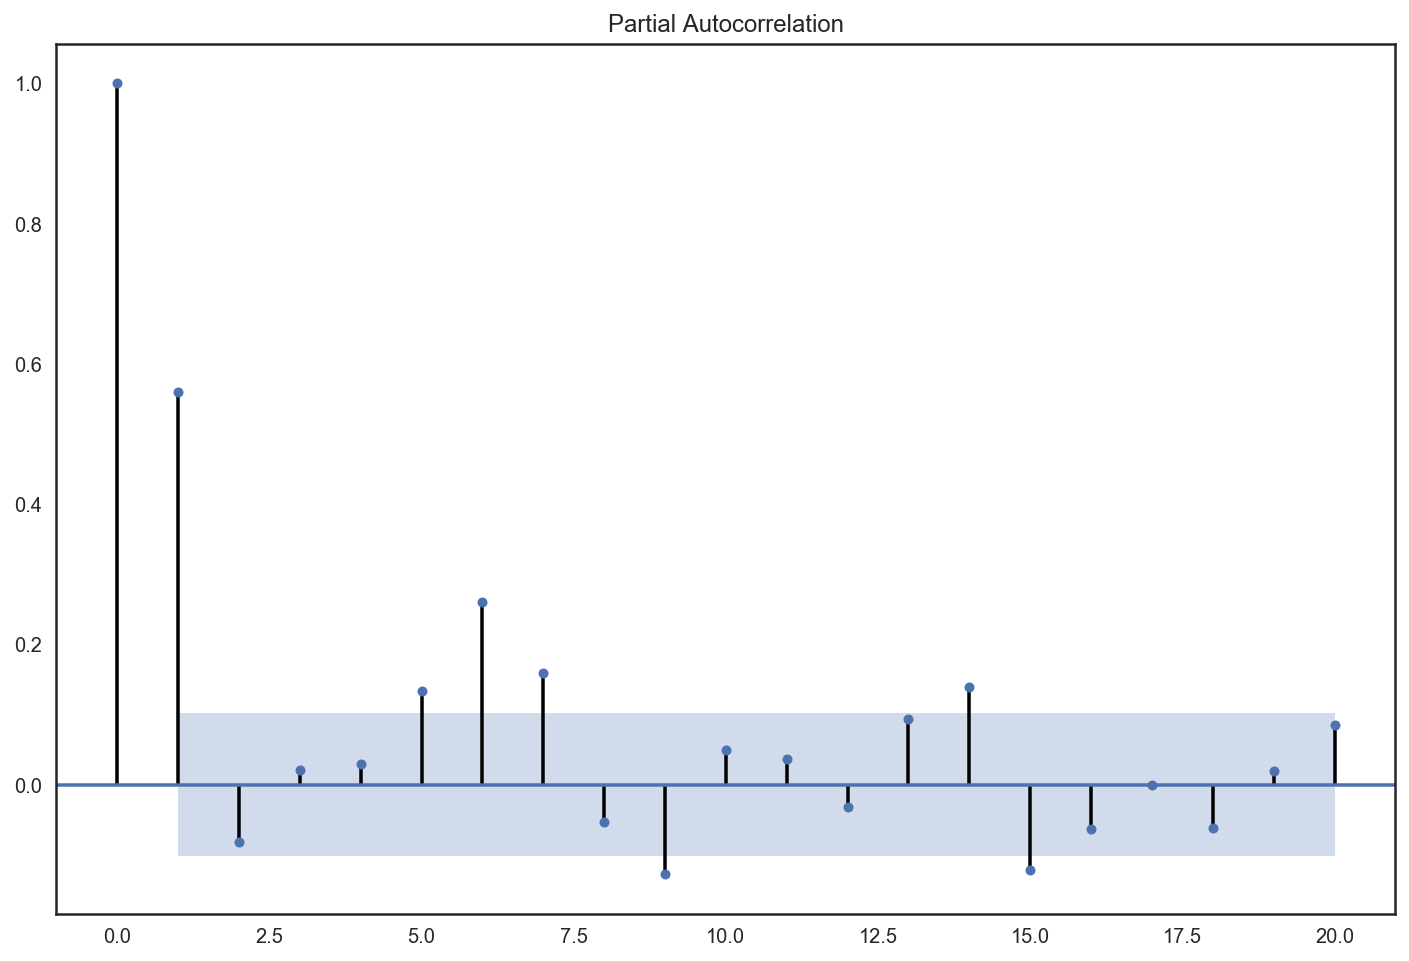

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

sns.set(rc={"figure.figsize": (12, 8)})
sns.set_style('white')

plot_pacf(shifted_rides.num_rides_0, lags = 20)[0]

d. Fit​ ​a​ ​linear​ ​regression​ ​model​ ​and​ ​evaluate​ ​on​ ​test​ ​for​ ​the​ ​best​ ​lags​ ​found​ ​by​ ​the
autocorrelation
e. Find​ ​trend​ ​using​ ​smoothing
1. Smooth​ ​the​ ​data​ ​according​ ​to​ ​the​ ​best​ ​lag​ ​and​ ​plot
2. Remove​ ​this​ ​trend​ ​from​ ​the​ ​data​ ​to​ ​plot​ ​seasonality​ ​and​ ​residuals
b. Find​ ​trend​ ​using​ ​ar​ ​model
1. Use​ ​the​ ​coefficients​ ​to​ ​remove​ ​the​ ​seasonality​ ​and​ ​plot​ ​the​ ​trend​ ​and​ ​residuals
c. Find​ ​residuals​ ​from​ ​the​ ​previous​ ​d.​ ​and​ ​e.

## Fit linear regression

score:  19.7246197594


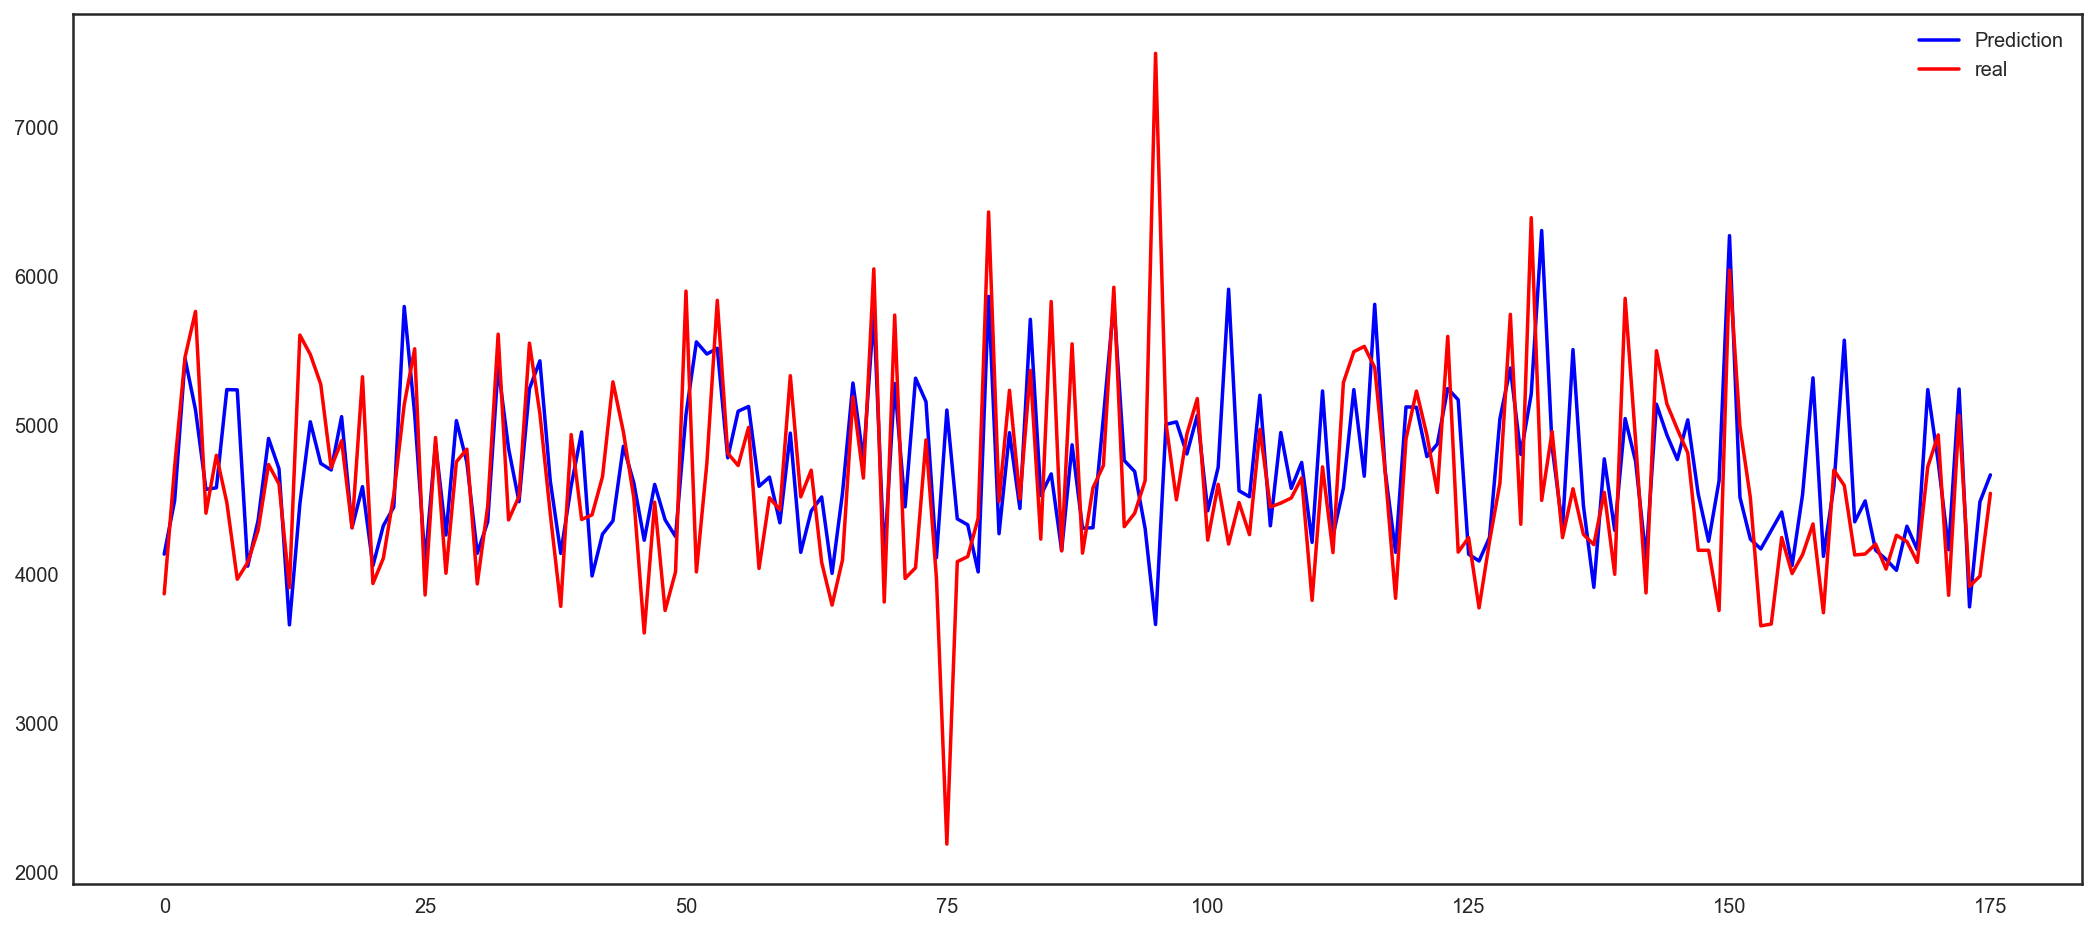

In [21]:
# linear regression

sns.set(rc={"figure.figsize": (18, 8)})
sns.set_style('white')

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

X = shifted_rides.ix[14:,1:9]
y = shifted_rides.num_rides_0[14:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)
#train.num_rides_0.plot()
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print "score: ", lr.score(X_test, y_test) * 100

plt.plot(y_pred, color = "blue", label = "Prediction")
plt.plot(y_test.values, color = "red", label = "real")
plt.legend()

## Smooth data according to best lag and plot (best lag is 1)

Text(0.5,1,u'Predictions of taxis')

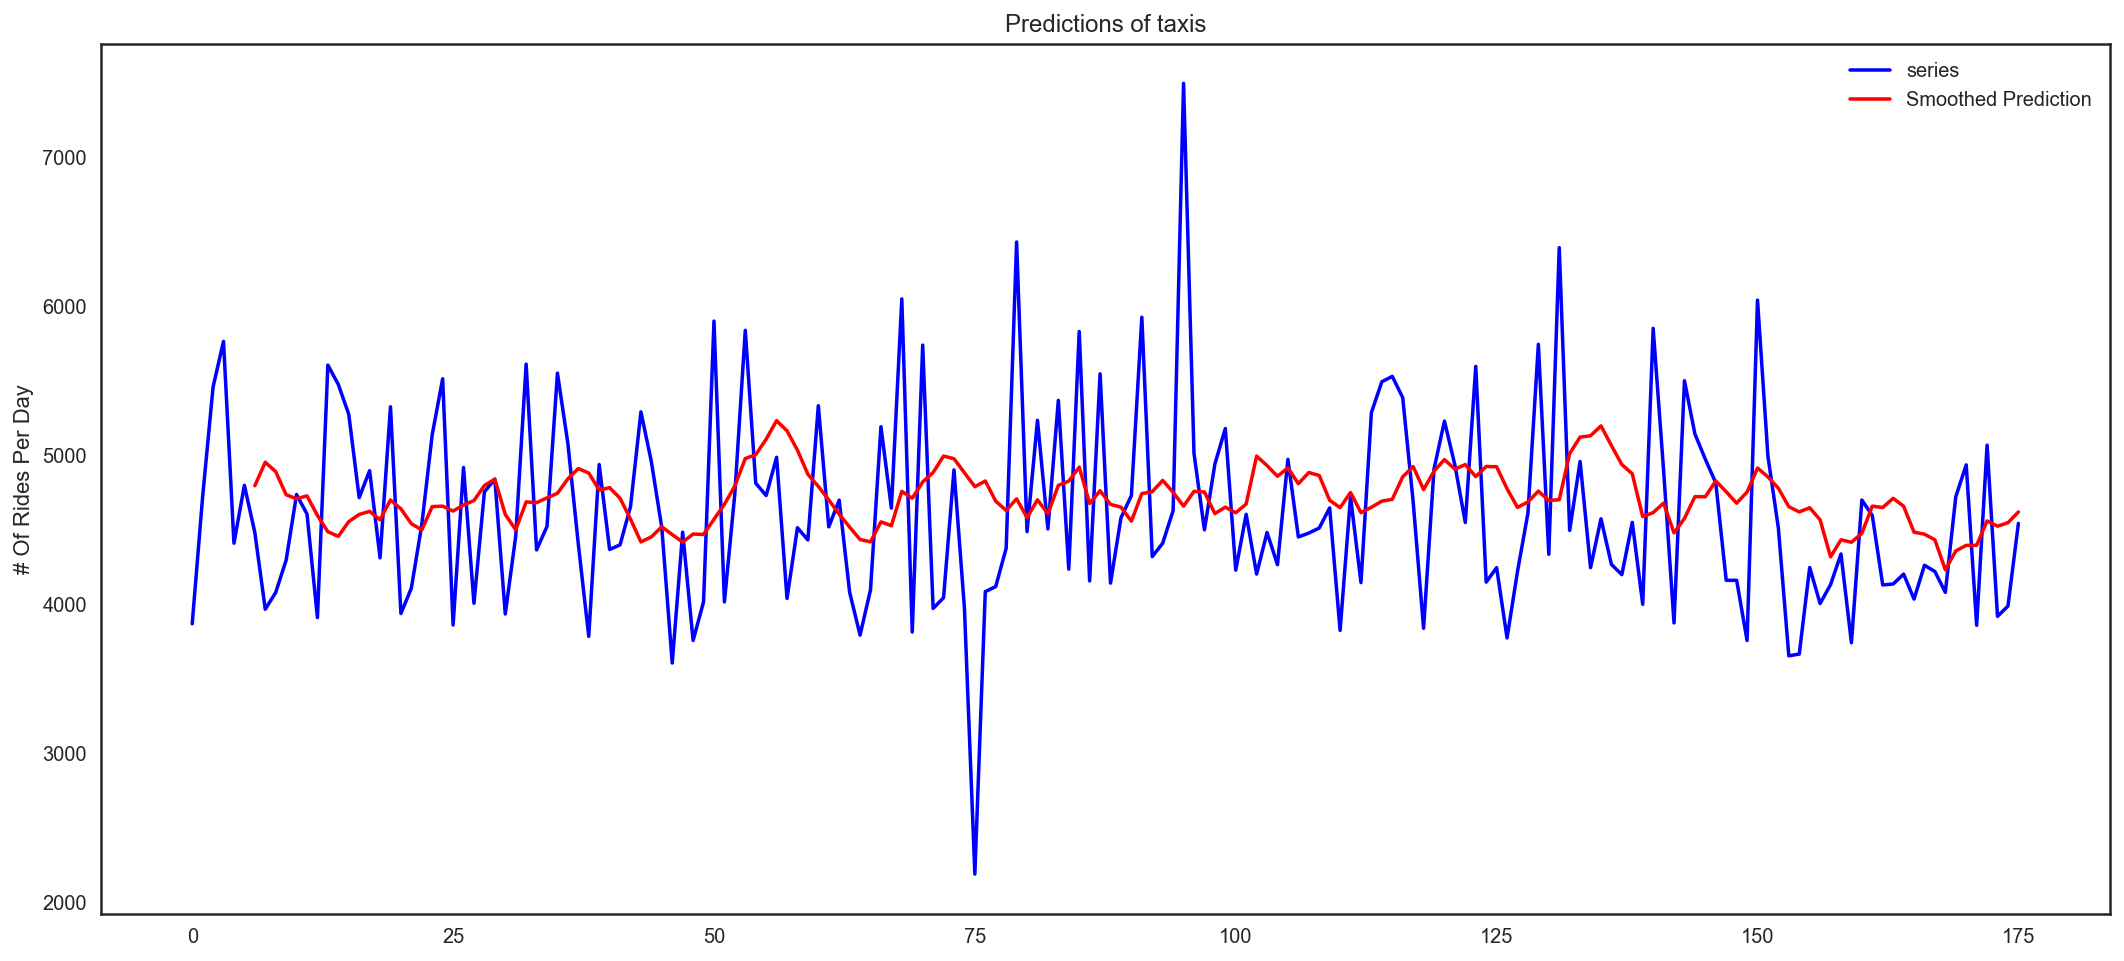

In [23]:
# remove trend from data and find seasonality
# Tail-rolling average transform
plt.plot(y_test.values, color = "blue", label = "series")


smooth_pred = pd.Series(y_pred).rolling(window=7).mean()
plt.plot(smooth_pred, color = "red", label = "Smoothed Prediction")

plt.ylabel("# Of Rides Per Day")
plt.legend()
plt.title("Predictions of taxis")

Text(0.5,1,u'removing seasonality')

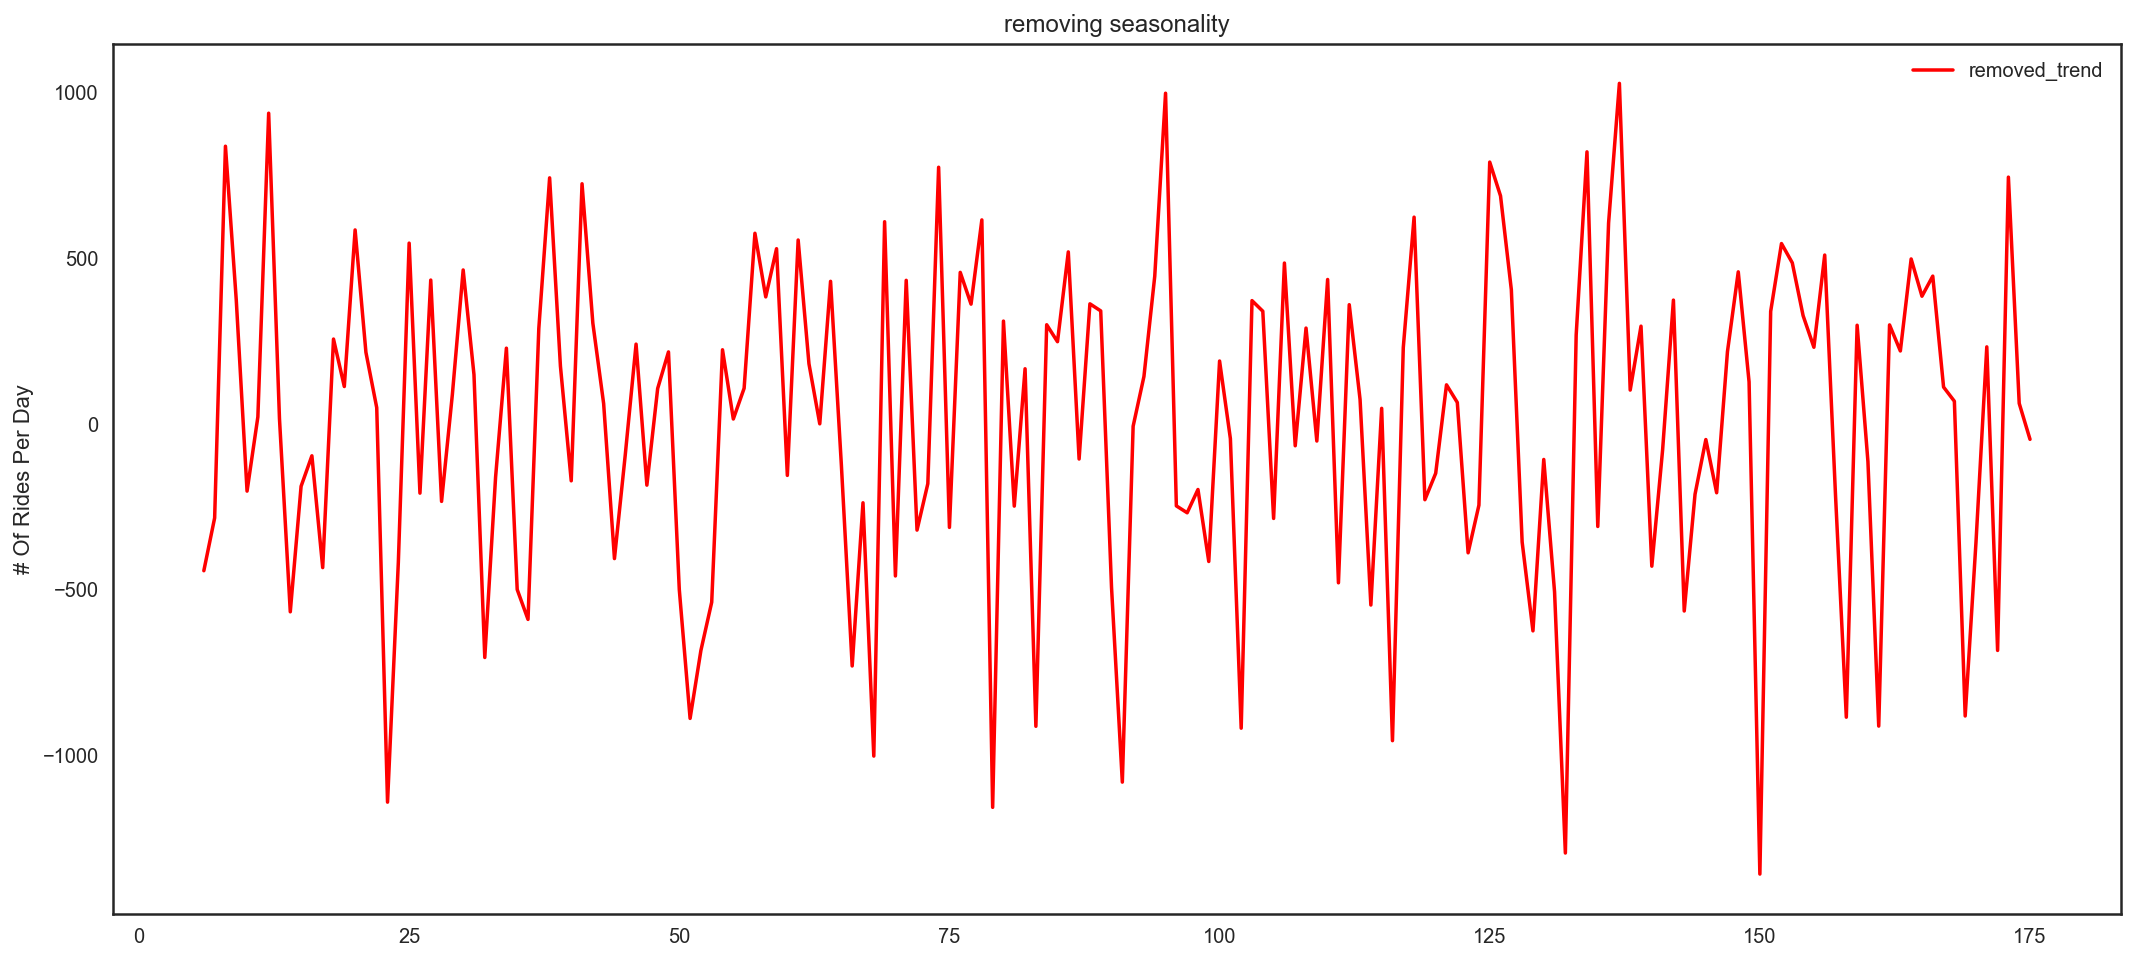

In [37]:
# remove trend from data and find seasonality
# Tail-rolling average transform, ar model find trend

removed_trend = smooth_pred - y_pred
# remove trend from data and find seasonality

plt.plot(removed_trend, color = "red", label = "removed_trend")


plt.ylabel("# Of Rides Per Day")
plt.legend()
plt.title("removing seasonality")

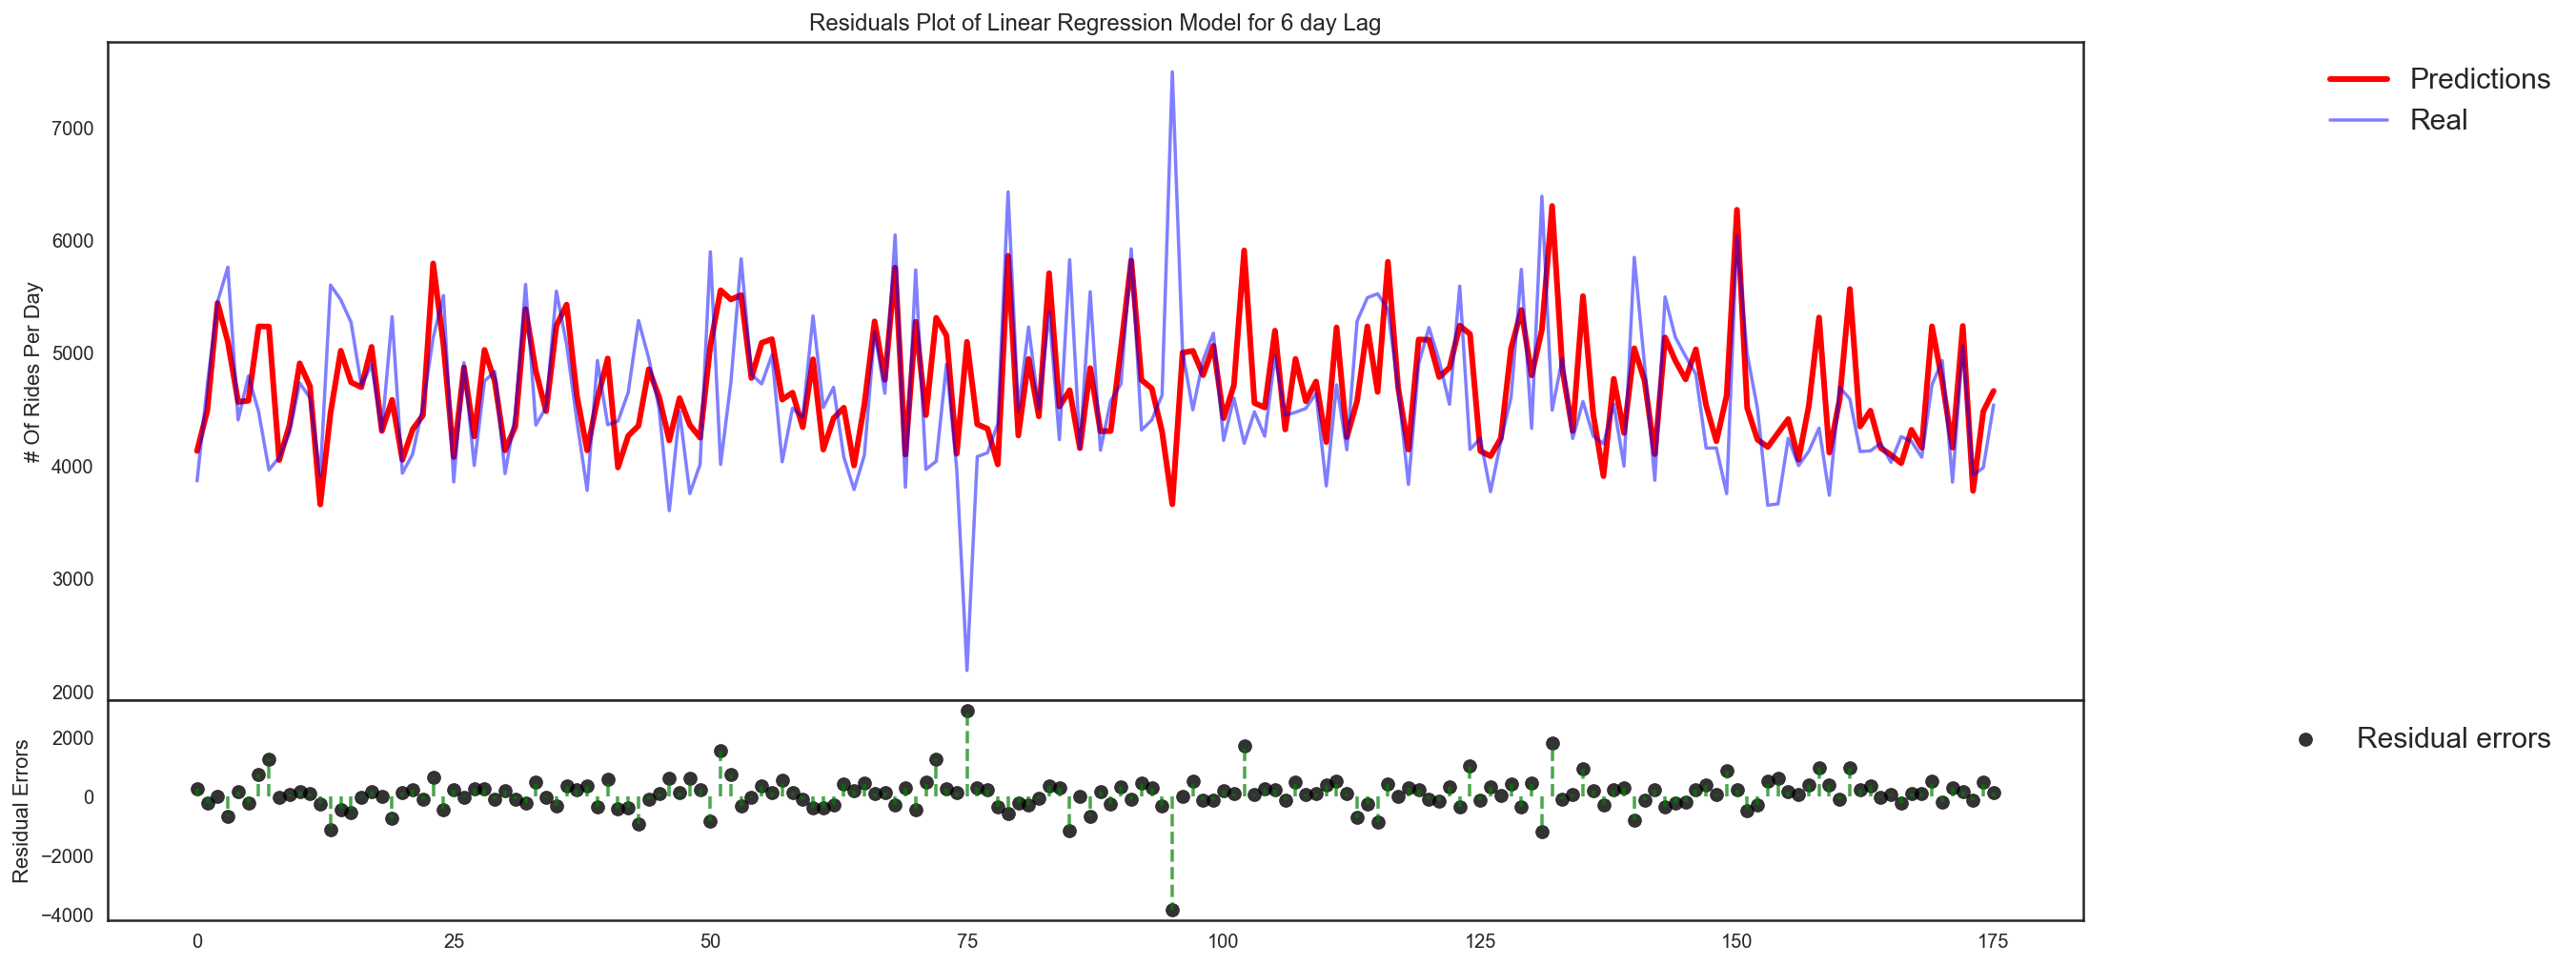

In [54]:
# plot model
fig1 = plt.figure()
residuals = y_pred - y_test.values

#initalize frame1
frame1=fig1.add_axes((.1,.3,.8,.6))

# predictions
plt.plot(y_pred, color = "red",label = "Predictions", linewidth = 3)
# real
plt.plot(y_test.values, color = "blue",label = "Real", alpha = .5)

#plt.scatter(x = range(len(y_test.values)), y = y_test.values, color = "blue", linestyle = "--", label = "Real", alpha = .8, s = 35)

# titles, legends
frame1.legend(bbox_to_anchor=(1.25,1.0), fontsize=15)
plt.title("Residuals Plot of Linear Regression Model for 6 day Lag")
plt.ylabel("# Of Rides Per Day")

# initialize second frame
frame2=fig1.add_axes((.1,.1,.8,.2))        
# residuals
frame2.scatter(range(len(residuals)), residuals, c='k', label='Residual errors', alpha = .8)
# residual lines
for i in range(len(residuals)):
    frame2.plot((i,i),(0,residuals[i]), ls='--', c='green', alpha = .7)
    
frame2.legend(bbox_to_anchor=(1.25,1.0), fontsize=15)
plt.ylabel("Residual Errors")
plt.show()



In [9]:
min_time = train.loc[train.num_rides_0.argmin()].num_rides_0
max_time = train.loc[train.num_rides_0.argmax()].num_rides_0
print min_time, max_time

2185.0 7316.0


Coefficients: [  6.82244413e-11  -1.50060797e-06   1.18590950e-02  -3.96080921e+01
   5.14428823e+04]


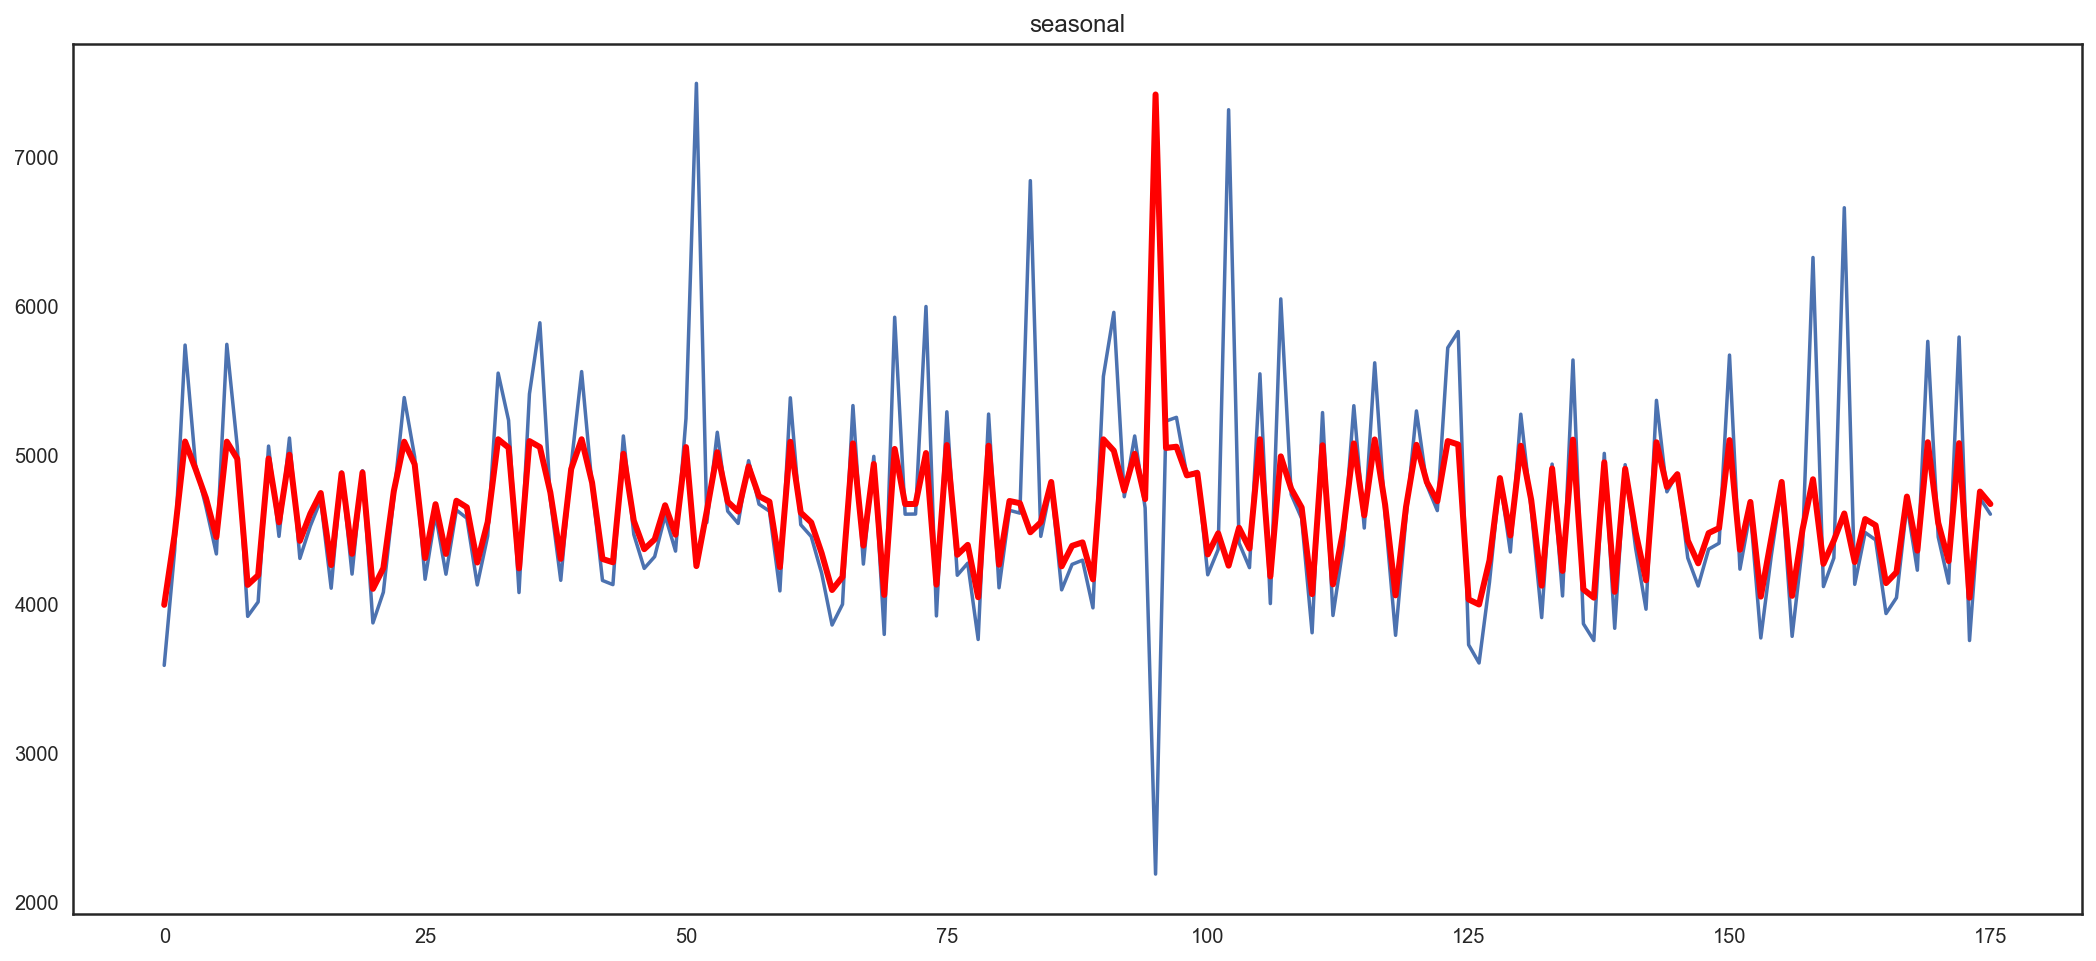

In [55]:
# Plot seasonality

from numpy import polyfit

degree = 4

X = X_test.num_rides_7
y = y_test

coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)

curve= []
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
plt.plot(X.values)
plt.plot(curve, color='red', linewidth=3)
plt.title("seasonal")
plt.show()